# Define the Problem

- I will predict the future house price in test data using my model which is trained by train data.
- I will use the feature for predicting the future price.(target variable)
    - But I will use all feature or some feature according to any circumstance

In [1]:
# import library
import pandas as pd
import numpy as np
import os
import warnings

os.chdir(r"C:\Users\joyh1\Desktop\GitRepo\data\kaggle_house")
warnings.filterwarnings(action='ignore')

In [2]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Shape of train data :', train.shape)
print('Shape of test data :', test.shape)
train.head()

Shape of train data : (1460, 81)
Shape of test data : (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# What is the extra column in train data ? 
# print columns in each data
print('Columns of train data :', train.columns)
print()
print('Columns of test data :', test.columns)

Columns of train data : Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       '

In [4]:
# SalesPrice(y_value) is given in train data, but test data doesn't. So I will definitely train my model using only the train data.
# Explore train data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.options.display.max_columns=82
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# checking missing value in train data
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

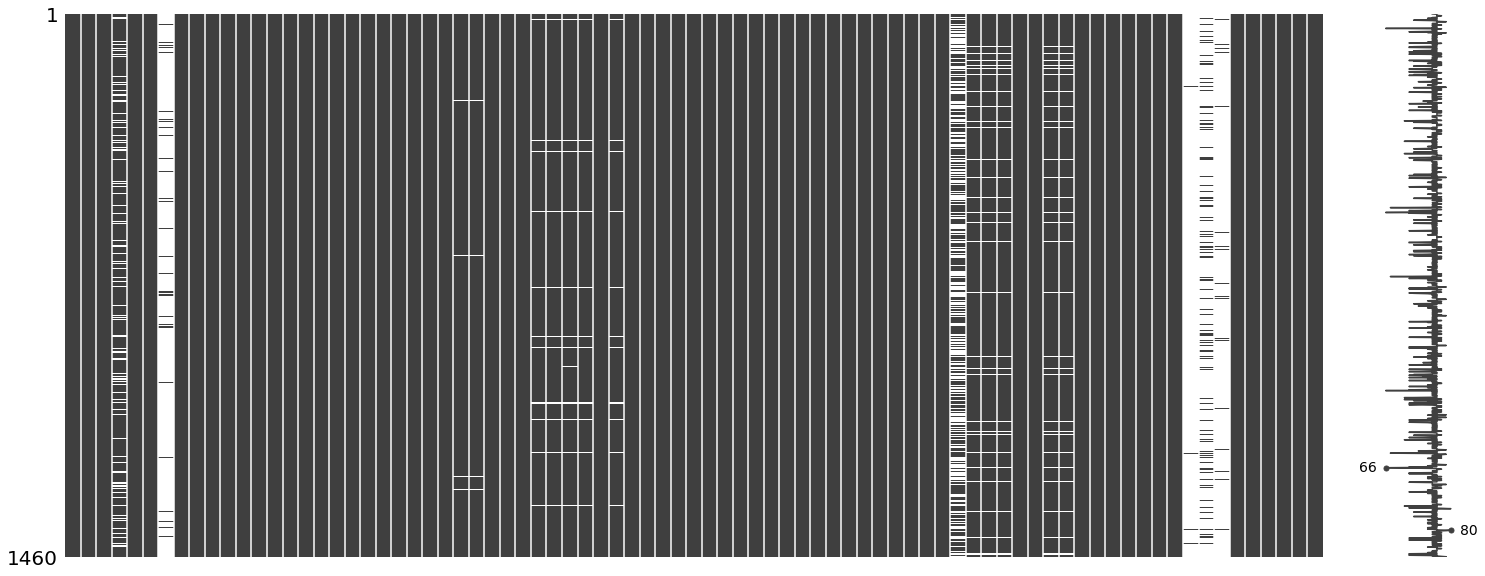

In [7]:
# visualize missing value using missingno library
import missingno as msno
msno.matrix(train)

In [8]:
# extract column names that have missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
# To check how many missing values in columns that has missing values, I make a dataframe that has columns which have missing values.
missing_cols = train.columns[train.isnull().any()].tolist()
missing_df = train[missing_cols]
print('* Raw all row_numbers', missing_df.shape)
print()
print('--------Missing Values counts---------')
missing_df.isnull().sum()

* Raw all row_numbers (1460, 19)

--------Missing Values counts---------


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### 'Alley' columns description

- Alley(골목): Type of alley access to property
    - Grvl: Gravel (자갈)
    - Pave:	Paved (포장도로)
    - NA  :	No alley access (골목 접근 없음)

In [10]:
# 'Alley', 'PoolQC', 'Fence', 'MiscFeature' columns has a lot of missing values in all row numbers(1460).
# Strat thinking what value must be replaced with the many missing values

# 1. Alley
missing_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
# NA values are replaced with 'No_alley' categorical values
train['Alley'] = train['Alley'].fillna('No_alley')
train['Alley'].value_counts()

No_alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

### 'PoolQC' columns description
- PoolQC: Pool quality
    - Ex : Excellent
    - Gd : Good
    - TA : Average/Typical
    - Fa : Fair
    - NA : No Pool

In [12]:
# 2. PoolQC
missing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [13]:
# 'NA' values are replaced with 'No pool' categorical values
train['PoolQC'] = train['PoolQC'].fillna('No_Pool')
train['PoolQC'].value_counts()

No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

### 'Fence' columns description
- Fence: Fence quality
	- GdPrv: Good Privacy
    - MnPrv: Minimum Privacy
    - GdWo: Good Wood
    - MnWw:	Minimum Wood/Wire
    - NA: No Fence

In [14]:
# 3. Fence
missing_df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [15]:
# 'NA' values are replaced with 'No_Fence' categorical values
train['Fence'] = train['Fence'].fillna('No_Fence')
train['Fence'].value_counts()

No_Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

### 'MiscFeature' columns description
- MiscFeature: Miscellaneous feature not covered in other categories (다른 카테고리에 포함되지 않는 잡다한 시설물)
	- Elev: Elevator
    - Gar2:	2nd Garage (if not described in garage section)
    - Othr: Other
    - Shed:	Shed (over 100 SF)
    - TenC:	Tennis Court
    - NA : None

In [16]:
# 4.MiscFeature
missing_df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [17]:
# 'NA' values are replaced with 'None' categorical values
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['MiscFeature'].value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

### LotFrontage description
 - LotFrontage: Linear feet of street connected to property (width of lot measured at the front part of a lot.) 
     * Term description link : https://www.gimme-shelter.com/frontage-50043/
 - Real-number value

In [18]:
train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [19]:
# Explore the row data which has missing value in 'LotFrontage' column in raw dataframe.
train.loc[train['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,No_alley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No_Pool,No_Fence,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,No_alley,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,No_alley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,No_Pool,GdWo,None,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,No_alley,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,No_Pool,MnPrv,None,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,No_alley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,No_Pool,No_Fence,None,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,No_Pool,No_Fence,None,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,No_Pool,No_Fence,None,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide

In [20]:
# user MICE(Multiple Imputation by Chained Equation) method for real-value columns('Frontage').
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=50, verbose=1, add_indicator=True, random_state=42)
after_imp = imp.fit_transform(np.array(train['LotFrontage']).reshape(-1,1))

In [21]:
# To make 'after_imp' 1d array, I made 'after_imp' list type
after_imp_list = after_imp.tolist()
imp_list = []
for i in range(0, len(after_imp_list)):
    e = after_imp_list[i][0]
    imp_list.append(e)
train['LotFrontage'] = np.array(imp_list)
train['LotFrontage'].isnull().sum()

0

### MasVnrType decription
- MasVnrType: Masonry veneer type (벽돌 베니어 벽은 일반적으로 벽돌, 석재 또는 제조 된 석재로 만들어진 단일 비 구조적 석조 벽돌 층)
    - BrkCmn: Brick Common
    - BrkFace: Brick Face
    - CBlock: Cinder Block
    - None: None
    - Stone: Stone

In [22]:
missing_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
# "None" value dosen't have same meaning contrary with NaN value in 'MasVnrType' column.
# So, I decided to use ' ? ' method to fill categorical missing value
train[train['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,70.049958,7851,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,216500
529,530,20,RL,70.049958,32668,Pave,No_alley,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,No_Pool,No_Fence,None,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.000000,8125,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,None,0,5,2008,WD,Normal,205950
936,937,20,RL,67.000000,10083,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,No_Pool,No_Fence,None,0,8,2009,WD,Normal,184900
973,974,20,FV,95.000000,11639,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,No_Pool,No_Fence,None,0,12,2008,New,Partial,182000
977,978,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,No_Pool,No_Fence,None,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.000000,13891,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,No_Pool,No_Fence,None,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.000000,9473,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,No_Pool,No_Fence,None,0,3,2008,WD,Normal,237000


In [24]:
# Use 'sklearn-pandas CategoricalImputer' method. Because the missing values are categorical values. 'DNN algorithm' or 'KNN algorithm'
# method is only applied to numeric values.
# 'sklearn-pandas CategoricalImputer' uses method which replcaed missing values with the most frequent values in the columns.
# change directory
os.chdir(r'C:\Users\joyh1\Desktop\GitRepo\KaggleStruggle\house_price')
from sklearn_pandas import CategoricalImputer 
imp = CategoricalImputer()
MasVnrType = imp.fit_transform(train['MasVnrType'])
train['MasVnrType'] = np.array(MasVnrType)
train['MasVnrType'].isnull().sum()

0

### MasVnrArea description
   - MasVnrArea: Masonry veneer area in square feet 
   - Real-value

In [25]:
# user MICE(Multiple Imputation by Chained Equation) method for real-value columns('MasVnrArea').
imp = IterativeImputer(max_iter=50, verbose=1, add_indicator=True, random_state=42)
after_imp = imp.fit_transform(np.array(train['MasVnrArea']).reshape(-1,1))
# To make 'after_imp' 1d array, I made 'after_imp' list type
after_imp_list = after_imp.tolist()
imp_list = []
for i in range(0, len(after_imp_list)):
    e = after_imp_list[i][0]
    imp_list.append(e)
train['MasVnrArea'] = np.array(imp_list)
train['MasVnrArea'].isnull().sum()

0

### BsmtQual description

- BsmtQual: Evaluates the height of the basement
    - Ex: Excellent (100+ inches)	
    - Gd: Good (90-99 inches)
    - TA: Typical (80-89 inches)
    - Fa: Fair (70-79 inches)
    - Po: Poor (<70 inches
    - NA: No Basement

In [27]:
missing_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [32]:
train['BsmtQual'] = train['BsmtQual'].fillna('No_Basement')
print(train['BsmtQual'].isnull().sum())
train['BsmtQual'].value_counts()

0


TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

### BstmCond description
- BsmtCond: Evaluates the general condition of the basement
     - Ex: Excellent
     - Gd: Good
     - TA: Typical - slight dampness allowed
     - Fa: Fair - dampness or some cracking or settling
     - Po: Poor - Severe cracking, settling, or wetness
     - NA: No Basement

In [34]:
train['BsmtCond'] = train['BsmtCond'].fillna('No_Basement')
print(train['BsmtCond'].isnull().sum())
train['BsmtCond'].value_counts()

0


TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64

### BstmExposure description
- BsmtExposure: Refers to walkout or garden level walls
     - Gd: Good Exposure
     - Av: Average Exposure (split levels or foyers typically score average or above)	
     - Mn: Mimimum Exposure
     - No: No Exposure
     - NA: No Basement

In [35]:
train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [36]:
train['BsmtExposure'] = train['BsmtExposure'].fillna('No_Basement')
print(train['BsmtExposure'].isnull().sum())
train['BsmtExposure'].value_counts()

0


No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64

### BsmtFinType1 description
- BsmtFinType1: Rating of basement finished area
     - GLQ: Good Living Quarters
     - ALQ: Average Living Quarters
     - BLQ: Below Average Living Quarters	
     - Rec: Average Rec Room
     - LwQ: Low Quality
     - Unf: Unfinshed
     - NA: No Basement

In [38]:
train['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [39]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No_Basement')
print(train['BsmtFinType1'].isnull().sum())
train['BsmtFinType1'].value_counts()

0


Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

### BsmtFinType2 description
- BsmtFinType1: Rating of basement finished area(if multiple types)
     - GLQ: Good Living Quarters
     - ALQ: Average Living Quarters
     - BLQ: Below Average Living Quarters	
     - Rec: Average Rec Room
     - LwQ: Low Quality
     - Unf: Unfinshed
     - NA: No Basement

In [40]:
train['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [41]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('No_Basement')
print(train['BsmtFinType2'].isnull().sum())
train['BsmtFinType2'].value_counts()

0


Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

### Electrical description
- Electrical: Electrical system

     - SBrkr: Standard Circuit Breakers & Romex
     - FuseA: Fuse Box over 60 AMP and all Romex wiring (Average)	
     - FuseF: 60 AMP Fuse Box and mostly Romex wiring (Fair)
     - FuseP: 60 AMP Fuse Box and mostly knob & tube wiring (poor)
     - Mix: Mixed

In [45]:
# 'Electrical' missing value is only one.
train[train['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,No_Pool,No_Fence,None,0,5,2008,WD,Normal,167500


In [47]:
# use CategoricalImputer of sklearn_pandas package. Because this method is replaced with the most frequent value.
# Above all, missing value is only one. I think it will be affecting the target variable little.
imp = CategoricalImputer()
elec_imp = imp.fit_transform(train['Electrical'])
train['Electrical'] = elec_imp
train['Electrical'].isnull().sum()

0

### FireplaceQu description
- FireplaceQu: Fireplace quality

     - Ex: Excellent - Exceptional Masonry Fireplace
     - Gd: Good - Masonry Fireplace in main level
     - TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
     - Fa: Fair - Prefabricated Fireplace in basement
     - Po: Poor - Ben Franklin Stove
     - NA: No Fireplace

In [49]:
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [51]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('No_Fireplace')
print(train['FireplaceQu'].isnull().sum())
train['FireplaceQu'].value_counts()

0


No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

### GarageType description
- GarageType: Garage location
		
     - 2Types: More than one type of garage
     - Attchd: Attached to home
     - Basment: Basement Garage
     - BuiltIn: Built-In (Garage part of house - typically has room above garage)
     - CarPort: Car Port
     - Detchd: Detached from home
     - NA: No Garage

In [54]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [55]:
train['GarageType'] = train['GarageType'].fillna('No_Garage')
print(train['GarageType'].isnull().sum())
train['GarageType'].value_counts()

0


Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

### GarageFinish description
- GarageFinish: Interior finish of the garage

     - Fin: Finished
     - RFn: Rough Finished	
     - Unf: Unfinished
     - NA	: No Garage

In [57]:
train['GarageFinish'] = train['GarageFinish'].fillna('No_Garage')
print(train['GarageFinish'].isnull().sum())
train['GarageFinish'].value_counts()

0


Unf          605
RFn          422
Fin          352
No_Garage     81
Name: GarageFinish, dtype: int64

### GarageQual description
- GarageQual: Garage quality

     - Ex: Excellent
     - Gd: Good
     - TA: Typical/Average
     - Fa: Fair
     - Po: Poor
     - NA: No Garage

In [59]:
train['GarageQual'] = train['GarageQual'].fillna('No_Garage')
print(train['GarageQual'].isnull().sum())
train['GarageQual'].value_counts()

0


TA           1311
No_Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

### GarageCond description
- GarageCond: Garage condition

     - Ex: Excellent
     - Gd: Good
     - TA: Typical/Average
     - Fa: Fair
     - Po: Poor
     - NA: No Garage

In [61]:
train['GarageCond'] = train['GarageCond'].fillna('No_Garage')
print(train['GarageCond'].isnull().sum())
train['GarageCond'].value_counts()

0


TA           1326
No_Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

### GarageYrBlt description
- GarageYrBlt: Year garage was built

In [64]:
# the number of 'GarageYrBlt' missing values is 81. I think that this number corresponds to No_garage number in other columns related with 'Garage'
train['GarageYrBlt'].isnull().sum()

81

In [65]:
# How match the missing value with the corresponding year?
train['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [68]:
# NaN value in GarageYrBlt matching is the oldest year. Because NaN value means that a garage dosen't exist in there.
# What the lowest value in 'GarageYrBlt' column?
lowest_val = train['GarageYrBlt'].min()
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(lowest_val)
print(train['GarageYrBlt'].isnull().sum())
train['GarageYrBlt'].value_counts()

0


1900.0    82
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1937.0     2
1906.0     1
1933.0     1
1908.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [73]:
# Finish replacing missing value with adequate value in all columns
train.columns[train.isnull().any()]

Index([], dtype='object')

# hwo to encode categorical feature?